In [23]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm

from create_in import create_in
from out_reader import out_reader

In [24]:
N = 300

S_namics = 150

alpha = 0.5

Cs = 0.001
chi_range = [0, 0.5, 1]
chi_surf = -0.3

In [25]:
phi_brush_prof = {}
for chi in chi_range:
    file_name_pro = create_in(
            template_surf_charge='/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/scf_templates/flat_brush_chi.in',
            range_param='Cs',
            min_val=0.1,
            max_val=0.1,
            Cs=Cs,
            chi=chi,
            chi_surf = chi_surf,
            N_layers=N,
            N=N,
            S=S_namics,
            alpha=alpha
        )

    # Парсим профили
    psi, phi_brush, phi_end_brush = out_reader(alpha = alpha,file_names=file_name_pro)
    phi_brush_prof[chi] = (phi_brush)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.294393e+00 |g| = 6.123865e+00 alpha = 1.000000e+00 
hessian scaling: 1.50501
it =  1  E = 2.046233e+00 |g| = 5.357880e+00 alpha = 1.163296e-01 
it =  2  E = 2.359620e+00 |g| = 6.137269e+00 alpha = 9.421688e-02 
it =  3  E = 8.053094e+00 |g| = 6.725664e+00 alpha = 9.533543e-03 
it =  4  E = 8.330027e+00 |g| = 6.383066e+00 alpha = 8.746740e-03 
it =  5  E = 5.900346e+00 |g| = 6.388974e+00 alpha = 1.672934e-02 
it =  6  E = 7.382848e+00 |g| = 6.395499e+00 alpha = 9.972250e-03 
it =  7  E = 7.667666e+00 |g| = 6.130207e+00 alpha = 8.236074e-03 
it =  8  E = 1.425709e+01 |g| = 6.044377e+00 alpha = 2.544924e-03 
it =  9  E = 7.458067e+00 |g| = 5.973521e+00 alpha = 8.496086e-03 
it =  10  E = 9.352220e+00 |g| = 5.921271e+00

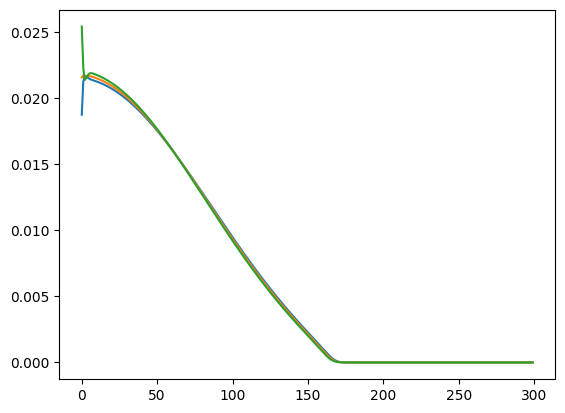

In [26]:
for i, (chi, (phi_brush)) in enumerate(phi_brush_prof.items()):
    
    plt.plot(phi_brush)
    # plt.ylim(0, 0.2)
    # plt.xlim(-0.5, 60)